In [55]:
##Esophogeal Masterbook!!!!
import numpy as np
import os
import pandas as pd
from glob import glob
import glob
import matplotlib.pyplot as plt
from skimage.draw import disk
from skimage import io
from PIL import Image

#Functions-
#Generates a circular mask from radius and point data we may want it to apply the mask too for simplicity
def circle_mask(arrayshape, center, radius, show='y'):
    mask = np.zeros(arrayshape, dtype=np.uint8)
    rr, cc = disk((center[0], center[1]), radius)
    mask[rr, cc] = 1
    mask=np.where(mask==1,mask,np.nan)
    if show=='y':
        plt.imshow(mask)
        plt.show()
    return(mask)

#Add Mueller Matrix Data- takes in the folderpath and center and radius of the desired ROI mask
def get_dolp(folderpath, center, radius):
    
    #Output plot parameters-
    plt.figure(figsize=(20,5))
    fig, axs = plt.subplots(1,5)
    fig.set_size_inches(10, 3)
    fig.tight_layout(pad=1.0)
    
    
    wavelengthlist=[405, 442, 473, 543, 632]
    #List of Mueller Matrix components to look at-
    mlist=["m11.txt","m21.txt","m31.txt","m14.txt"]
    #Call cirle mask funciton above to make mask array
    mask=circle_mask((1024,1024),center,radius, show='n')
    #Empty list to add data to as it is accumulated-
    dolplist=[]
    
    for i in range(len(wavelengthlist)):
        wavelength=wavelengthlist[i]
        #This allows the code to skip over wavelengths that are not present-
        wavelengthforpath="analyzed_"+str(wavelength)+"_MES"
        ims = glob.glob(os.path.join(folderpath, wavelengthforpath, "*.txt"))
        if not len(ims):
            print("no MM for wavelength %s" %wavelengthforpath)
            continue
        else:
            muellerlist=[]
            #Mueller matrix text files of interest are loaded into mueller list
            for j in range(len(mlist)):
                #Assmble folderpath of MM data-
                path=os.path.join(folderpath, wavelengthforpath, mlist[j])
                #Load data
                Mueller_comps=np.loadtxt(path)
                #Add data to Mueller list
                muellerlist.append(Mueller_comps)
        #***Actual Calculation happens here***
        dolp=np.sqrt(muellerlist[1]**2+muellerlist[2]**2)/muellerlist[0]
        
        #Plot paramters are set
        axs[i].set_yticklabels([])
        axs[i].set_xticklabels([])
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        axs[i].set_title("DoLP "+ str(wavelength))
        #Dolp map is ploted
        f=axs[i].imshow(dolp)
        cbar=plt.colorbar(f,ax=axs[i],fraction=0.046)
        cbar.ax.tick_params(labelsize=8)
        #Mean is taken over ROI by applying mask
        dolplist.append(np.nanmean(dolp*mask))
        
        #Output data for higher res 
        if i==4:
            image_filename = r"C:\Users\justinamb\Desktop\dolp.txt"
#             dolpimg=(dolp.astype(np.float64)/np.nanmax(dolp))*255
            
#             dolpimg=dolpimg.astype(np.uint8)
#             plt.imshow(dolpimg)
#             plt.show()

        
#             dolpim=Image.fromarray(dolpimg)
#             dolpim.save(image_filename)
            np.savetxt(image_filename, dolp)

        
    plt.show()
    print("Dolp for each wavelength:",dolplist)
    #Show masked region for reference-
    plt.imshow(dolp*mask)
    plt.imshow(dolp, alpha=0.25)
    plt.title("Masked Region")
    plt.show()
    return(dolplist)

<Figure size 2000x500 with 0 Axes>

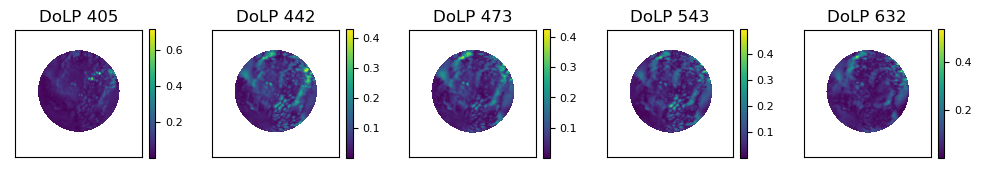

Dolp for each wavelength: [0.06295750453810041, 0.06761353306031535, 0.048149928096357646, 0.06479526285298022, 0.04640233332509715]


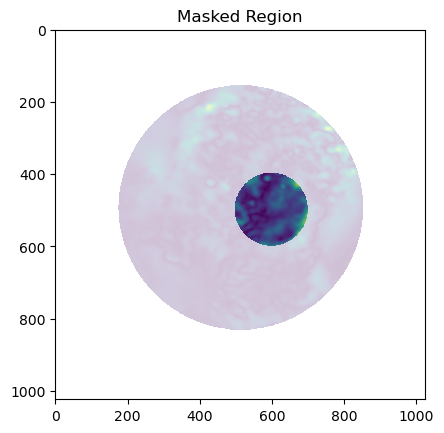

In [57]:
#To process different data change folderpath and mask parameters, all actual processing happens in get_dolp function
#Normal_270=get_dolp(r"C:\Users\justinamb\Documents\Esophogeal_from_globus\ID270\Normal\Pol",(358, 454), 146)

#Tumor_270=get_dolp(r"C:\Users\justinamb\Documents\Esophogeal_from_globus\ID270\Tumor\Pol",(512, 346), 98)

Normal_271=get_dolp(r"C:\Users\justinamb\Documents\Esophogeal_from_globus\ID271\Normal\Pol",(498, 598), 104)

#Tumor_271=get_dolp(r"C:\Users\justinamb\Documents\Esophogeal_from_globus\ID271\Tumor\Pol",(494, 316), 138)

#Mask parameters can be estimted via eye balling or if desired I have another notebook that has a mask drawing tool for more precision.